In [1]:
from autometrics.dataset.datasets.simplification import SimpDA
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression.PLS import PLS
from autometrics.aggregator.regression import Ridge, ElasticNet, Lasso, RandomForest, GradientBoosting, Linear
from autometrics.aggregator.regression.BudgetRegression import BudgetRegression
from autometrics.generator.llm_judge_proposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = SimpDA()
dataset.add_metrics(all_metrics)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 41/41 [01:04<00:00,  1.58s/it]


computing greedy matching.


100%|██████████| 68/68 [00:00<00:00, 186.38it/s]


done in 65.32 seconds, 66.45 sentences/sec


In [3]:
from scipy.stats import pearsonr

calculate_correlation(dataset, correlation=pearsonr)

{'fluency': {'BLEU': np.float64(0.4978070159364292),
  'CHRF': np.float64(0.47670827237222585),
  'TER': np.float64(-0.35606033512166724),
  'GLEU': np.float64(0.4602137730648517),
  'SARI_P': np.float64(0.3354411792473859),
  'SARI_F': np.float64(0.18524882802646164),
  'BERTScoreP_roberta-large': np.float64(0.6415308989291819),
  'BERTScoreR_roberta-large': np.float64(0.5394384101031042),
  'BERTScoreF_roberta-large': np.float64(0.6154830819649143),
  'FKGL': np.float64(0.05413014256431637)},
 'meaning': {'BLEU': np.float64(0.6357765079676255),
  'CHRF': np.float64(0.7031313808431027),
  'TER': np.float64(-0.4820361614986118),
  'GLEU': np.float64(0.6219364960915097),
  'SARI_P': np.float64(0.5341334598785605),
  'SARI_F': np.float64(0.27696933393228207),
  'BERTScoreP_roberta-large': np.float64(0.698907765439936),
  'BERTScoreR_roberta-large': np.float64(0.7467056574487586),
  'BERTScoreF_roberta-large': np.float64(0.7608550407207391),
  'FKGL': np.float64(0.14541280208889917)},
 's

In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42)

In [5]:
display_top_5_metrics_by_validation(dev, test, False)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),BERTScoreF_roberta-large (0.5376877382185893),BLEU (0.41617364713787347),BERTScoreR_roberta-large (0.5149223616914173),GLEU (0.37419371080499375)
meaning,BERTScoreF_roberta-large (0.7232674330257098),BERTScoreP_roberta-large (0.6106572417507335),BERTScoreR_roberta-large (0.7413929364907887),CHRF (0.6554432845335177),BLEU (0.5339829783478871)
simplicity,BERTScoreP_roberta-large (0.6150344373913592),BERTScoreF_roberta-large (0.5279062401502087),BLEU (0.4511342893339773),BERTScoreR_roberta-large (0.4813202091070132),GLEU (0.35397132469284753)


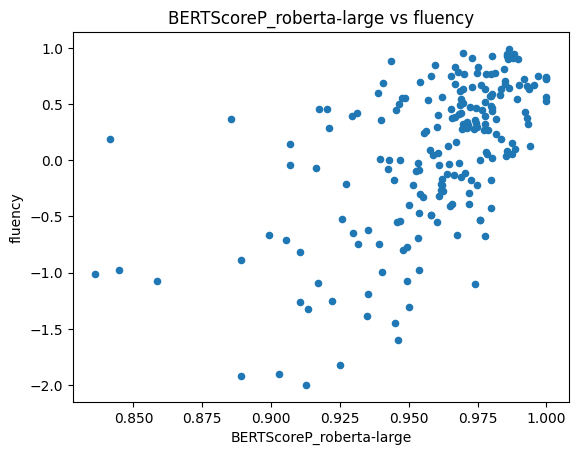

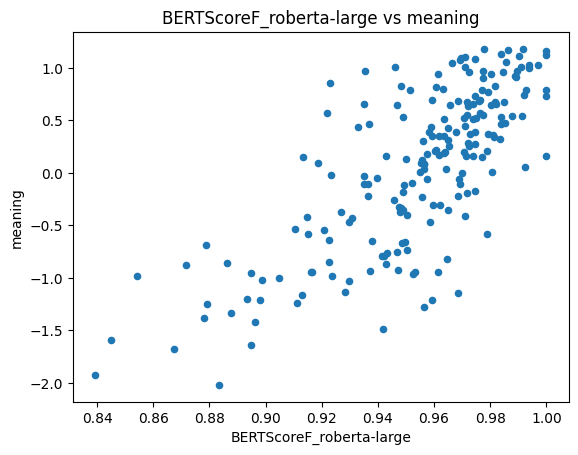

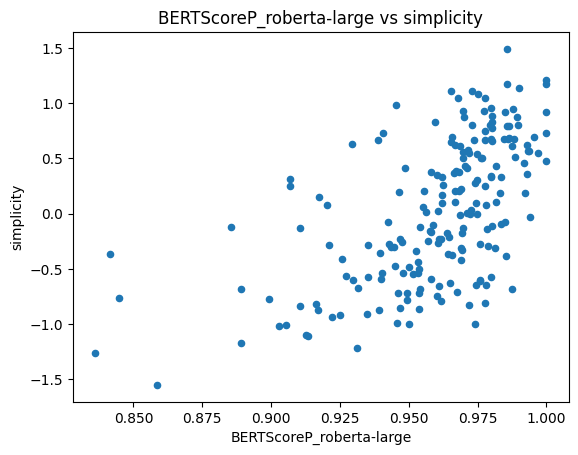

In [6]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, False)
    plot_metric_target_scatterplot(test, metric, target_column)

In [7]:
for model in [PLS, ElasticNet, Lasso, Ridge, RandomForest, GradientBoosting, Linear]:
    for target_column in dataset.target_columns:
        model_instance = model(dataset=train, name=model.__name__ + '_' + target_column)
        model_instance.learn(train, target_column)
        model_instance.predict(train, target_column)
        model_instance.predict(dev, target_column)
        model_instance.predict(test, target_column)

In [8]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),Linear_simplicity (0.518575086474253),PLS_simplicity (0.5551093003727058),Linear_fluency (0.534725547986715),RandomForest_simplicity (0.5598451041916531)
meaning,PLS_meaning (0.7022572729233594),BERTScoreF_roberta-large (0.7232674330257098),BERTScoreP_roberta-large (0.6106572417507335),PLS_simplicity (0.6405182278958974),BERTScoreR_roberta-large (0.7413929364907887)
simplicity,BERTScoreP_roberta-large (0.6150344373913592),Linear_simplicity (0.5882203351763051),PLS_simplicity (0.5554260358049699),Linear_fluency (0.5487441363974002),RandomForest_simplicity (0.5643159466393798)


In [9]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),RandomForest_simplicity (0.5598451041916531),PLS_simplicity (0.5551093003727058),Linear_meaning (0.5452113181144553),RandomForest_fluency (0.5446159164124591)
meaning,BERTScoreR_roberta-large (0.7413929364907887),Linear_meaning (0.7276966100935641),BERTScoreF_roberta-large (0.7232674330257098),PLS_meaning (0.7022572729233594),RandomForest_meaning (0.6951124524994039)
simplicity,BERTScoreP_roberta-large (0.6150344373913592),Linear_simplicity (0.5882203351763051),RandomForest_simplicity (0.5643159466393798),PLS_simplicity (0.5554260358049699),Linear_fluency (0.5487441363974002)


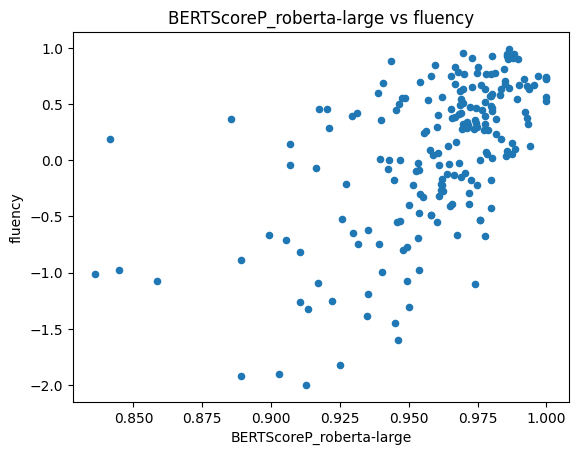

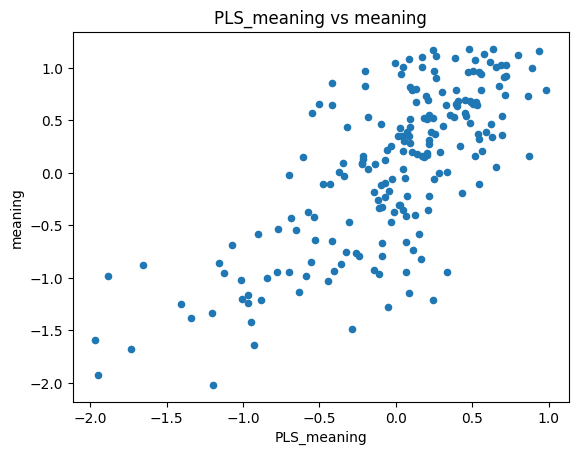

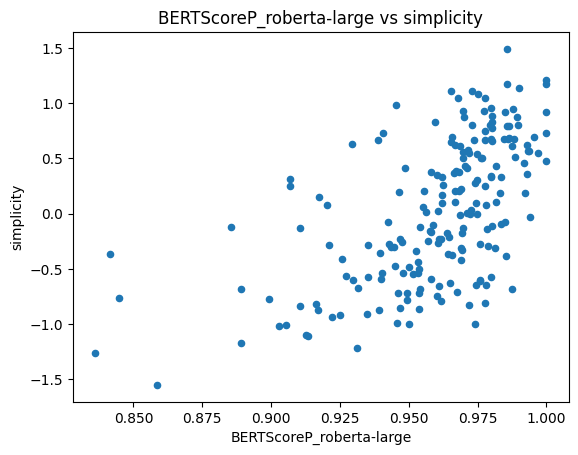

In [10]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)


In [11]:
# Budget Runs
for model in [PLS, ElasticNet, Lasso, Ridge, RandomForest, GradientBoosting, Linear]:
    for budget in [2, 3, 5, 10, 15, 20, 25]:
        for target_column in dataset.target_columns:
            model_instance = model(dataset=train, name=model.__name__ + '_' + target_column)
            budget_model = BudgetRegression(model_instance, budget)
            budget_model.learn(train, target_column)
            budget_model.predict(train, target_column)
            budget_model.predict(dev, target_column)
            budget_model.predict(test, target_column)

In [12]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,PLS_simplicityTop 2 (0.5638960924265597),PLS_simplicityTop 3 (0.5638960924265597),BERTScoreP_roberta-large (0.5799887010646303),Linear_fluencyTop 2 (0.5903815903487739),Linear_fluencyTop 3 (0.5903815903487739)
meaning,Linear_fluencyTop 2 (0.655718982365588),Linear_fluencyTop 3 (0.655718982365588),Linear_meaningTop 2 (0.7395406879404367),Linear_meaningTop 3 (0.7395406879404367),Linear_meaningTop 5 (0.7395406879404367)
simplicity,Linear_fluencyTop 2 (0.6150831659565011),Linear_fluencyTop 3 (0.6150831659565011),BERTScoreP_roberta-large (0.6150344373913592),PLS_simplicityTop 2 (0.6050146261840823),PLS_simplicityTop 3 (0.6050146261840823)


In [13]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,Linear_fluencyTop 2 (0.5903815903487739),Linear_fluencyTop 3 (0.5903815903487739),BERTScoreP_roberta-large (0.5799887010646303),RandomForest_simplicityTop 20 (0.5758706988510...,PLS_fluencyTop 2 (0.572441864538298)
meaning,BERTScoreR_roberta-large (0.7413929364907887),Linear_meaningTop 2 (0.7395406879404367),Linear_meaningTop 3 (0.7395406879404367),Linear_meaningTop 5 (0.7395406879404367),Rg_meaningTop 2 (0.7330131460540644)
simplicity,Linear_fluencyTop 2 (0.6150831659565011),Linear_fluencyTop 3 (0.6150831659565011),BERTScoreP_roberta-large (0.6150344373913592),PLS_simplicityTop 2 (0.6050146261840823),PLS_simplicityTop 3 (0.6050146261840823)


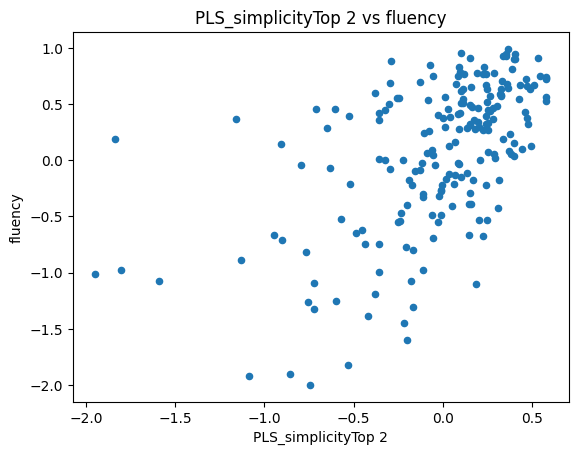

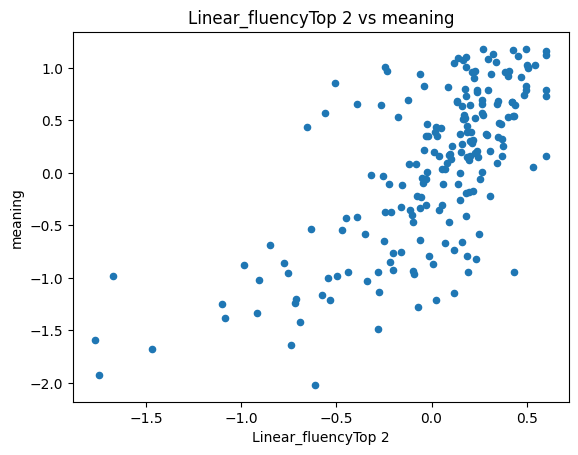

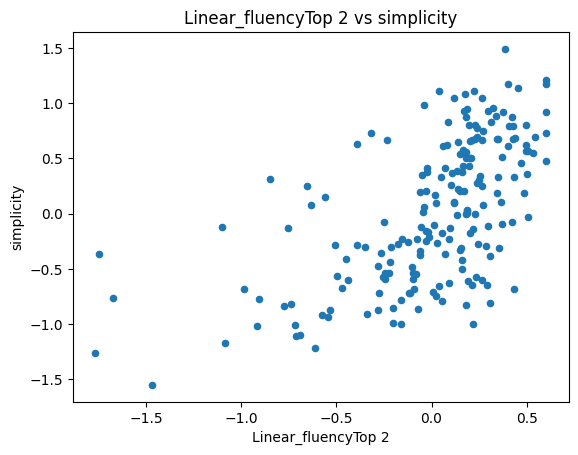

In [14]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)